## Decision Trees

#### Module Check

- matplotlib
- sklearn
- statmodels
- numpy
- pandas

In [13]:
from sklearn.datasets import load_iris                                 # Import the dataset
from sklearn import tree                                               # Visualize the decision tree
from sklearn.tree import DecisionTreeClassifier                        # Import the decision tree classifier
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

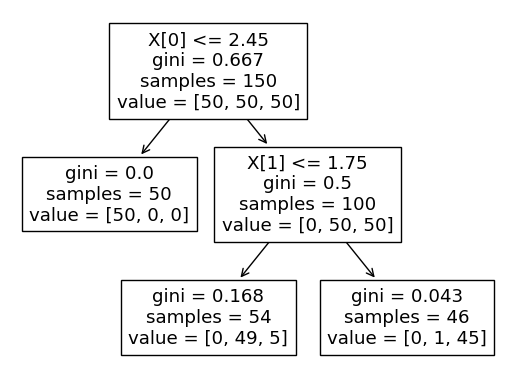

In [15]:
# Visualize the tree --> Feature, threshold & Gini impurity
tree.plot_tree(tree_clf);

#### Import Heart diseases dataset

In [16]:
df = pd.read_csv('heart_disease.csv')

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [18]:
# Idnetify all the categorical variables in the data

cat_features = df.select_dtypes(include = "object").columns
print (cat_features)

#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))
    
print (df.info())

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Gender', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int32  
 8   Gender            319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 n

In [19]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [20]:
# Create class(y) and features(X) from the dataset

y = df['HeartDisease']
X = df.drop('HeartDisease',axis=1)

[Text(0.5084186422413793, 0.9545454545454546, 'X[8] <= 7.5\ngini = 0.157\nsamples = 319795\nvalue = [292422, 27373]'),
 Text(0.25250875538793105, 0.8636363636363636, 'X[3] <= 0.5\ngini = 0.062\nsamples = 175258\nvalue = [169658, 5600]'),
 Text(0.1446434985632184, 0.7727272727272727, 'X[6] <= 0.5\ngini = 0.053\nsamples = 172276\nvalue = [167572, 4704]'),
 Text(0.07394935344827586, 0.6818181818181818, 'X[8] <= 5.5\ngini = 0.04\nsamples = 160285\nvalue = [157027, 3258]'),
 Text(0.0415319683908046, 0.5909090909090909, 'X[4] <= 13.5\ngini = 0.023\nsamples = 113841\nvalue = [112505, 1336]'),
 Text(0.021641522988505746, 0.5, 'X[10] <= 1.5\ngini = 0.02\nsamples = 108862\nvalue = [107741, 1121]'),
 Text(0.011494252873563218, 0.4090909090909091, 'X[1] <= 0.5\ngini = 0.018\nsamples = 103967\nvalue = [103004, 963]'),
 Text(0.005747126436781609, 0.3181818181818182, 'X[8] <= 4.5\ngini = 0.013\nsamples = 69865\nvalue = [69403, 462]'),
 Text(0.0028735632183908046, 0.22727272727272727, 'X[0] <= 29.11\n

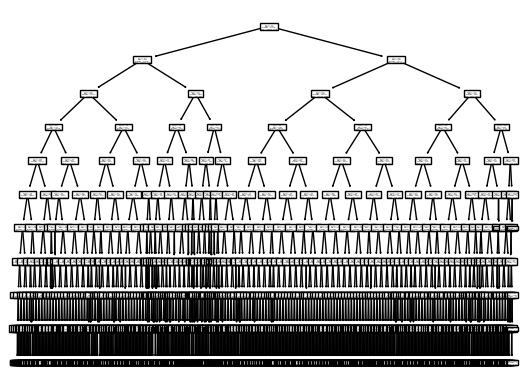

In [23]:
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X, y)
tree.plot_tree(tree_clf)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57907   460]
 [ 5199   393]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.46      0.07      0.12      5592

    accuracy                           0.91     63959
   macro avg       0.69      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959



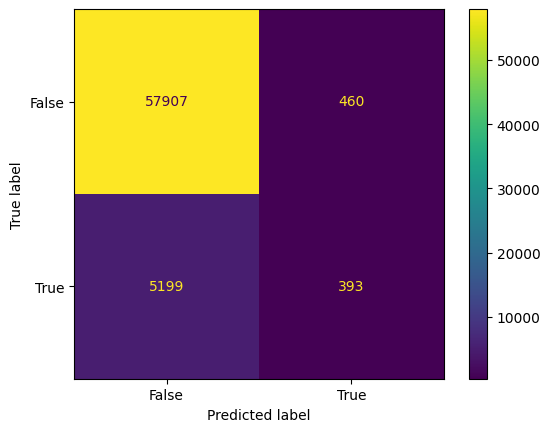

In [25]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: 0.911521
Precision: 0.460727
Recall: 0.070279
F1 score: 0.121955
ROC AUC: 0.815760


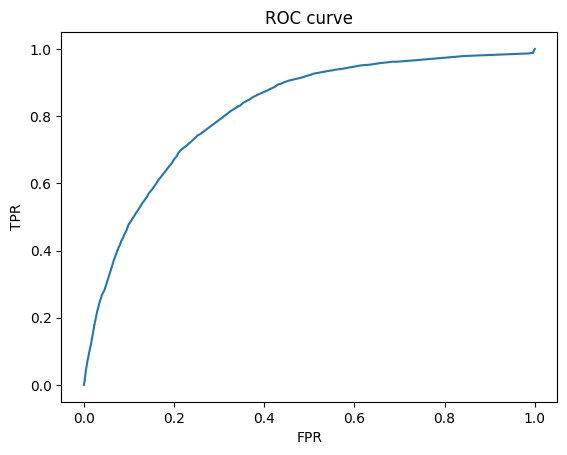

In [26]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
    
# ROC AUC
y_hat = tree_clf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_hat[:,1])
print('ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_hat[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()